<a href="https://colab.research.google.com/github/HemersonFarias/DataScience/blob/main/Challenge_looq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.2 MB 1.7 MB/s 


## Código que pegar usuário e senha (correto)

In [ ]:
import mysql.connector
from getpass import getpass


mydb = mysql.connector.connect(user=input("Enter username: "),  
                               password=getpass("Enter password: "), 
                               host='35.199.127.241', 
                               database='looqbox_challenge'
)

mycursor = mydb.cursor()

#mycursor.execute("SELECT PRODUCT_COD, PRODUCT_NAME, PRODUCT_VAL AS 'PRODUCT VALUE' FROM data_product order by PRODUCT_VAL DESC LIMIT 10; ")

#myresult = mycursor.fetchall()



Enter username: looqbox-challenge
Enter password: ··········


## Question 1

In [ ]:
mycursor.execute("SELECT * FROM data_product_sales")

myresult = mycursor.fetchall()

In [ ]:
data = pd.DataFrame(myresult, columns = ['Store_cod', 'Product_code', 'Date', 'Sales_value', 'Sales_qty']) #transfor to DataFrame and set the name of columns

In [ ]:
data['Store_cod'] = data.Store_cod.astype(int) #set Store_cod as integer


In [ ]:
data['Product_code'] = data.Product_code.astype(int) #set Product_code as integer


In [ ]:
data['Date'] = pd.to_datetime(data.Date) #transfor Date to datetime

In [ ]:
data.Date.head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: Date, dtype: datetime64[ns]

In [ ]:
def my_data(vStore_cod, vProduct_code, vDate):
  new_data = data.loc[data['Store_cod'] == vStore_cod]
  new_data = new_data.loc[data['Product_code'] == vProduct_code]
  new_data = new_data.loc[data['Date'] >= vDate[0]]
  new_data = new_data.loc[data['Date'] <= vDate[1]]

  return new_data


In [ ]:
data.Product_code.unique()

array([    18,     48,    172,    275,    311,    365,    485,    589,
          614,    626,    707,    868,   1023,   1102,   1111,   1223,
         1450,   1501,   1850,   2120,   2218,   2468,   2624,   2772,
         2853,   2933,   2947,   2986,   3771,   3775,   4028,   4086,
         4210,   4854,   5065,   6019,   6430,   6476,   6479,   6609,
         6704,   6710,   7214,   7767,   8154,   8408,  10557,  11645,
        11778,  12639,  13311,  19477,  21862,  22101,  22595,  23141,
        26793,  33633,  38542,  46824,  50133,  55167,  58664,  67108,
        83765,  86166,  96287, 102136, 103198, 105553, 133593, 141288,
       151422, 155703, 241404,     10,     11,     12,     13,     14,
           15,     17,     19,     20,     21,     22,     23,     24,
           25,     27,     28,     29,     30,     31,     32,     33,
           34,     35,   1171,   1838,   3155,   5902,   5984,  13089,
        19468,  21768,  36075,  38920, 123115, 175754])

In [ ]:
my_data(1,172,['2019-01-05', '2019-01-31'])

,Store_cod,Product_code,Date,Sales_value,Sales_qty
3730,1,172,2019-01-05,553.15,185
3731,1,172,2019-01-06,457.47,153
3732,1,172,2019-01-07,460.46,154
3733,1,172,2019-01-08,523.25,175
3734,1,172,2019-01-09,879.06,294
3735,1,172,2019-01-10,732.55,245
3736,1,172,2019-01-11,630.89,211
3737,1,172,2019-01-12,526.24,176
3738,1,172,2019-01-13,472.42,158
3739,1,172,2019-01-14,436.54,146


In [ ]:
teste_new_data = data.loc[data['Date'] >= d[0] ]
teste_new_data

,Store_cod,Product_code,Date,Sales_value,Sales_qty
4,1,18,2019-01-05,893.80,82
5,1,18,2019-01-06,741.20,68
6,1,18,2019-01-07,654.00,60
7,1,18,2019-01-08,741.20,68
8,1,18,2019-01-09,1373.40,126
...,...,...,...,...,...
2173128,9,241404,2019-12-27,7671.75,193
2173129,9,241404,2019-12-28,6201.00,156
2173130,9,241404,2019-12-29,4889.25,123
2173131,9,241404,2019-12-30,4730.25,119


In [ ]:
d = ['2019-01-05', '2019-01-31'] 

In [ ]:
data.head()

,Store_cod,Product_code,Date,Sales_value,Sales_qty
0,1,18,2019-01-01,708.50,65
1,1,18,2019-01-02,1297.10,119
2,1,18,2019-01-03,1144.50,105
3,1,18,2019-01-04,1090.00,100
4,1,18,2019-01-05,893.80,82


# Question 2

## Importing

In [ ]:
mycursor.execute("SELECT STORE_CODE, STORE_NAME, START_DATE, END_DATE, BUSINESS_NAME, BUSINESS_CODE FROM data_store_cad LIMIT 100") #use query 1
query1 = mycursor.fetchall() #fetches all results and put in query1

In [ ]:
mycursor.execute("SELECT STORE_CODE, DATE, SALES_VALUE, SALES_QTY FROM data_store_sales WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'") #use query 2
query2 = mycursor.fetchall() #fetches all results and put in query2

## Transforming Data

In [ ]:
df1 = pd.DataFrame(query1, columns = ['Store_cod', 'Product_code', 'Start_Date','End_Date', 'Business_Name', 'Business_code']) #tranform query 1 to dataframe and chose the name of columns
df2 = pd.DataFrame(query2, columns = ['Store_cod', 'Date', 'Sale_value', 'Sales_qty']) ##tranform query 2 to dataframe and chose the name of columns

In [ ]:
df1.Start_Date.dtypes #check type of column

dtype('O')

In [ ]:
df1['Start_Date'] = pd.to_datetime(df1.Start_Date) #transform to date  the columns Start_Date, because was imported as object
df2['Date'] = pd.to_datetime(df2.Date) #transform to date  the columns Date

## Filtering Data

In [ ]:
df2 = df2[(df2['Date'] > '2019-12-01') & (df2['Date'] < '2019-12-31')] #filter query 2 as asked

## Calculate ticket value

In [ ]:
df2['Ticket'] = df2.Sale_value/df2.Sales_qty #Calculate ticket value

In [ ]:
df2

,Store_cod,Date,Sale_value,Sales_qty,Ticket
6700,1,2019-12-02,170756.36,11085,15.404272
6701,10,2019-12-02,122944.35,4649,26.445332
6702,11,2019-12-02,222921.67,7513,29.671459
6703,12,2019-12-02,197926.09,6797,29.119625
6704,13,2019-12-02,170756.36,11085,15.404272
...,...,...,...,...,...
7275,5,2019-12-30,169775.21,11035,15.385157
7276,6,2019-12-30,169775.21,11035,15.385157
7277,7,2019-12-30,169775.21,11035,15.385157
7278,8,2019-12-30,168003.11,10936,15.362391


## Merge the columns

In [ ]:
df0 = pd.merge(df2, df1, on = 'Store_cod') #merge two columns (query1 and query2)
df0

,Store_cod,Date,Sale_value,Sales_qty,Ticket,Product_code,Start_Date,End_Date,Business_Name,Business_code
0,1,2019-12-02,170756.36,11085,15.404272,Sao Paulo,2006-10-01,,Varejo,1
1,1,2019-12-03,196899.17,12805,15.376741,Sao Paulo,2006-10-01,,Varejo,1
2,1,2019-12-04,341691.51,22195,15.394977,Sao Paulo,2006-10-01,,Varejo,1
3,1,2019-12-05,296725.34,19332,15.348921,Sao Paulo,2006-10-01,,Varejo,1
4,1,2019-12-06,244171.36,15800,15.453884,Sao Paulo,2006-10-01,,Varejo,1
...,...,...,...,...,...,...,...,...,...,...
575,9,2019-12-26,236975.89,8170,29.005617,London,2014-10-01,,Farma,4
576,9,2019-12-27,249839.86,8622,28.977019,London,2014-10-01,,Farma,4
577,9,2019-12-28,201536.13,6958,28.964664,London,2014-10-01,,Farma,4
578,9,2019-12-29,159300.08,5497,28.979458,London,2014-10-01,,Farma,4


## Choose the columns and rename

In [ ]:
result_df = df0[['Product_code','Business_Name','Ticket']] #Choose just 3 columns to show on the result
#result_df = result_df.rename(columns ={'Product_code': 'Loja', 'Business_Name': 'Categoria'}) #rename columns

In [ ]:
result = result_df.groupby(['Product_code','Business_Name'], as_index=False).agg('mean').round(2) #calculae meand from group Loja and Categoria

In [ ]:
result = result.rename(columns ={'Product_code': 'Loja', 'Business_Name': 'Categoria', 'Ticket':'TM'}) #rename columns

## Result

In [ ]:
result #show result!

,Loja,Categoria,TM
0,Bahia,Atacado,15.39
1,Bangkok,Posto,13.67
2,Belem,Proximidade,15.36
3,Berlin,Proximidade,15.39
4,Buenos Aires,Atacado,15.39
5,Chicago,Varejo,15.53
6,Dubai,Atacado,15.39
7,Hong Kong,Farma,26.32
8,London,Farma,29.00
9,Madri,Farma,29.01


In [ ]:
#Importing data
import mysql.connector
from getpass import getpass


mydb = mysql.connector.connect(user=input("Enter username: "),  #call a imput to the user put username
                               password=getpass("Enter password: "), #call a imput to the user put password
                               host='35.199.127.241', 
                               database='looqbox_challenge'
)
mycursor = mydb.cursor()
mycursor.execute("SELECT STORE_CODE, STORE_NAME, START_DATE, END_DATE, BUSINESS_NAME, BUSINESS_CODE FROM data_store_cad LIMIT 100") #use query 1
query1 = mycursor.fetchall() #fetches all results and put in query1
mycursor.execute("SELECT STORE_CODE, DATE, SALES_VALUE, SALES_QTY FROM data_store_sales WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'") #use query 2
query2 = mycursor.fetchall() #fetches all results and put in query2

#Transforming Data
df1 = pd.DataFrame(query1, columns = ['Store_cod', 'Product_code', 'Start_Date','End_Date', 'Business_Name', 'Business_code']) #tranform query 1 to dataframe and chose the name of columns
df2 = pd.DataFrame(query2, columns = ['Store_cod', 'Date', 'Sale_value', 'Sales_qty']) #tranform query 2 to dataframe and chose the name of columns
df1.Start_Date.dtypes #check type of column
df1['Start_Date'] = pd.to_datetime(df1.Start_Date) #transform to date  the columns Start_Date, because was imported as object
df2['Date'] = pd.to_datetime(df2.Date) #transform to date  the columns Date

#Filtering Data
df2 = df2[(df2['Date'] > '2019-12-01') & (df2['Date'] < '2019-12-31')] #filter query 2 as asked

#Calculate ticket value
df2['Ticket'] = df2.Sale_value/df2.Sales_qty #Calculate ticket value

#Merge the columns
df0 = pd.merge(df2, df1, on = 'Store_cod') #merge two columns (query1 and query2)

#Choose the columns and rename
result_df = df0[['Product_code','Business_Name','Ticket']] #Choose just 3 columns to show on the result
result = result_df.groupby(['Product_code','Business_Name'], as_index=False).agg('mean').round(2) #calculae meand from group Loja and Categoria
result = result.rename(columns ={'Product_code': 'Loja', 'Business_Name': 'Categoria', 'Ticket':'TM'}) #rename columns

result #show result!

Enter username: looqbox-challenge
Enter password: ··········


,Loja,Categoria,TM
0,Bahia,Atacado,15.39
1,Bangkok,Posto,13.67
2,Belem,Proximidade,15.36
3,Berlin,Proximidade,15.39
4,Buenos Aires,Atacado,15.39
5,Chicago,Varejo,15.53
6,Dubai,Atacado,15.39
7,Hong Kong,Farma,26.32
8,London,Farma,29.00
9,Madri,Farma,29.01


# Question 3

## Importing library seaborn

In [ ]:
import seaborn as sns #importing library seabonr

## Importing table IMDB_movies

In [ ]:
mycursor.execute("SELECT * FROM IMDB_movies;") #select table IMDB_movies
imdb_movies = mycursor.fetchall() #fetches all results and put in imdb_movie

In [ ]:
imdb_movies = pd.DataFrame(imdb_movies, columns = ['Id', 'Title', 'Genre', 'Director','Actors', 'Year', 'RunTime', 'Rating', 'Votes', 'RevenueMillions', 'Metascore']) #tranform query 1 to dataframe and chose the name of columns


## Expanding columns Genre, Director and Actors

In [ ]:
imdb_movies.Genre = imdb_movies.Genre.str.split(",") #split genre to generate a list
imdb_movies.Actors = imdb_movies.Actors.str.split(",") #split actors to generate a list

In [ ]:
imdb_movies.Rating = imdb_movies.Rating.astype(int) #set Rating as integer

In [ ]:
imdb_movies.Genre.explode().unique() #show the list of Genre

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

In [ ]:
imdb_movies['Genre(Action)'] = imdb_movies.Genre.apply(lambda x: 'Action' in x) #Show when it has Action Genre
imdb_movies['Genre(Sci-Fi)'] = imdb_movies.Genre.apply(lambda x: 'Sci-Fi' in x) #Show when it has Sci-Fi Genre
imdb_movies['Genre(Crime)'] = imdb_movies.Genre.apply(lambda x: 'Crime' in x) #Show when it has Crime Genre
imdb_movies['Genre(Romance)'] = imdb_movies.Genre.apply(lambda x: 'Romance' in x) #Show when it has Romance Genre

In [ ]:
Action_list = { #list o use on map to set Action when it's True and Others when False
    False: 'Others',
    True: 'Action'}
Sci_Fi_list = {  #list o use on map to set Sci-Fi when it's True and Others when False
    False: 'Others',
    True: 'Sci_Fi'}
Crime_list = { #list o use on map to set Crime when it's True and Others when False
    False: 'Others',
    True: 'Crime'}
Romance_list = { #list o use on map to set Romance when it's True and Others when False
    False: 'Others',
    True: 'Romance'}

In [ ]:
Action_list = { #map to set Action when it's True and Others when False
    False: 'Others',
    True: 'Action'}

In [ ]:
Sci_Fi_list = {  #list o use on map to set Sci-Fi when it's True and Others when False
    False: 'Others',
    True: 'Sci_Fi'}

In [ ]:
Crime_list = { #list o use on map to set Crime when it's True and Others when False
    False: 'Others',
    True: 'Crime'}  

In [ ]:
Romance_list = { #list o use on map to set Romance when it's True and Others when False
    False: 'Others',
    True: 'Romance'}  

In [ ]:
imdb_movies['Genre(Action)'] = imdb_movies['Genre(Action)'].map(Action_list) #Change the name of data as list before
imdb_movies['Genre(Sci-Fi)'] = imdb_movies['Genre(Sci-Fi)'].map(Sci_Fi_list)
imdb_movies['Genre(Crime)'] = imdb_movies['Genre(Crime)'].map(Crime_list)
imdb_movies['Genre(Romance)'] = imdb_movies['Genre(Romance)'].map(Romance_list)

In [ ]:
imdb_movies #show the result to confirm

## Plots

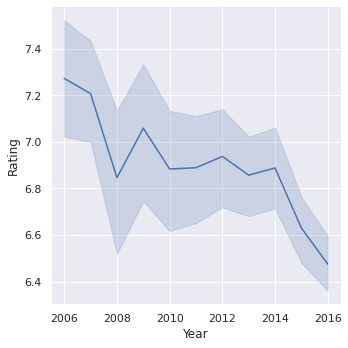

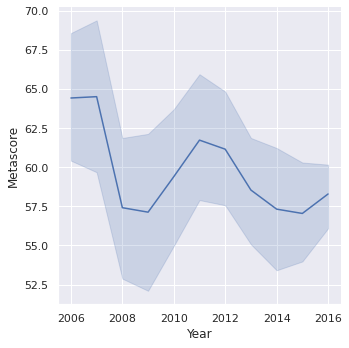

In [ ]:
sns.relplot(x='Year',y='Rating',kind='line',data=imdb_movies)
sns.relplot(x='Year',y='Metascore',kind='line',data=imdb_movies)


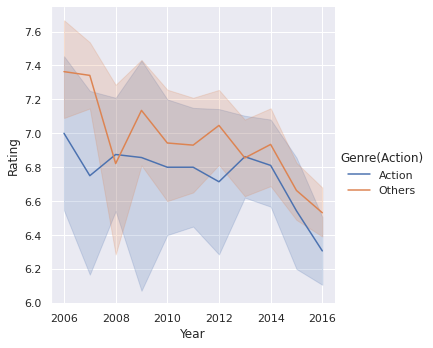

In [ ]:
sns.relplot(x='Year',y='Rating',hue='Genre(Action)',kind='line',data=imdb_movies) 

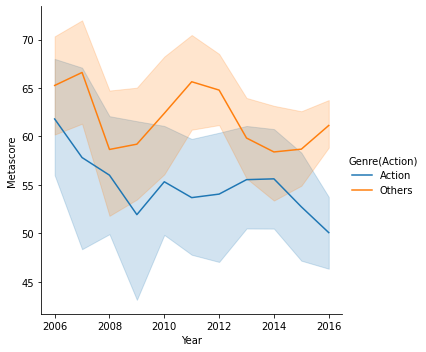

In [ ]:
sns.relplot(x='Year',y='Metascore',hue='Genre(Action)',kind='line',data=imdb_movies)

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

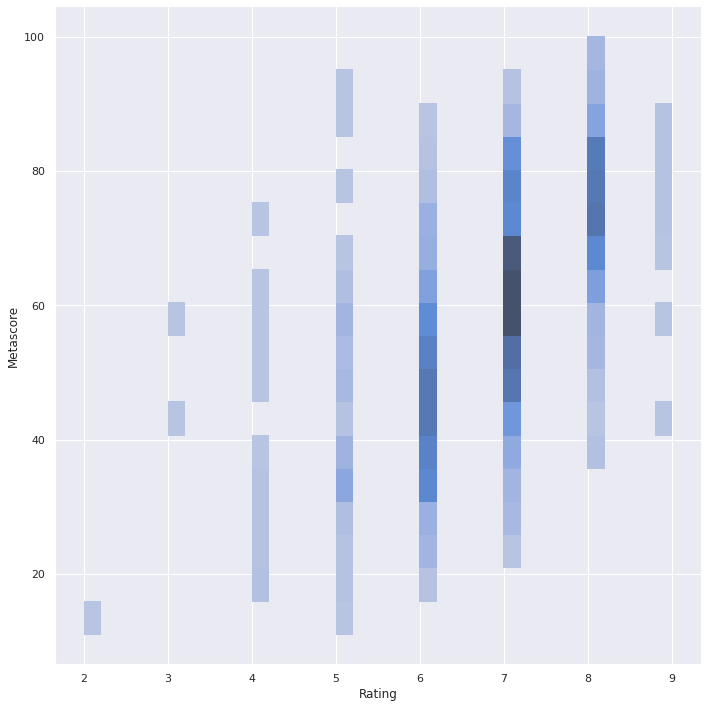

In [ ]:
sns.displot(x='Rating',y='Metascore', data=imdb_movies, height=10)

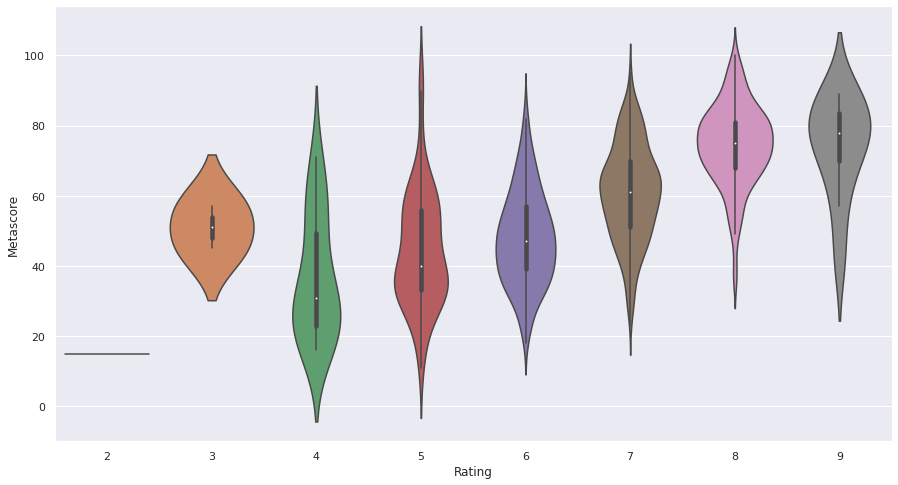

In [ ]:
sns.violinplot(x='Rating',y='Metascore', data=imdb_movies, alpha = 0.8)



In [ ]:
sns.relplot(x='Metascore',y='Rating',,data=imdb_movies['Genre(Action)']) 

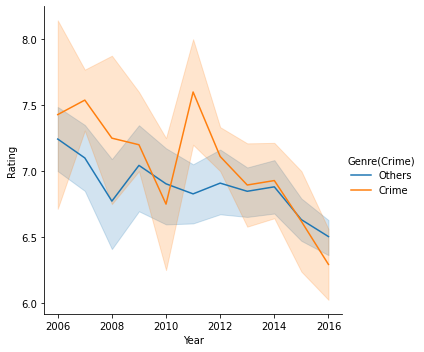

In [ ]:
sns.relplot(x='Year',y='Rating',hue='Genre(Crime)',kind='line',data=imdb_movies)

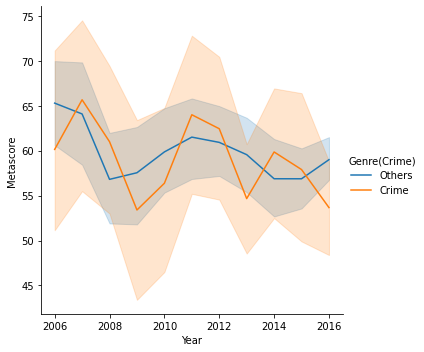

In [ ]:
sns.relplot(x='Year',y='Metascore',hue='Genre(Crime)',kind='line',data=imdb_movies)

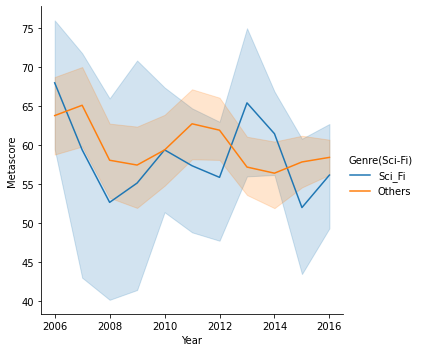

In [ ]:
sns.relplot(x='Year',y='Metascore',hue='Genre(Sci-Fi)',kind='line',data=imdb_movies)

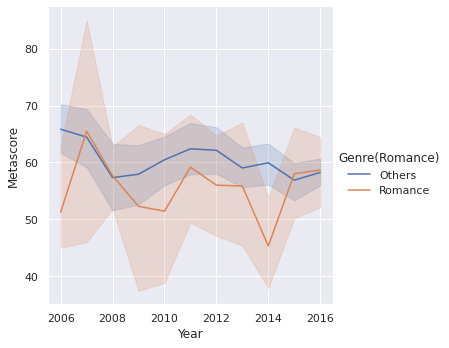

In [ ]:
sns.relplot(x='Year',y='Metascore',hue='Genre(Romance)',kind='line',data=imdb_movies)

In [ ]:
sns.set(rc = {'figure.figsize':(6,6)})

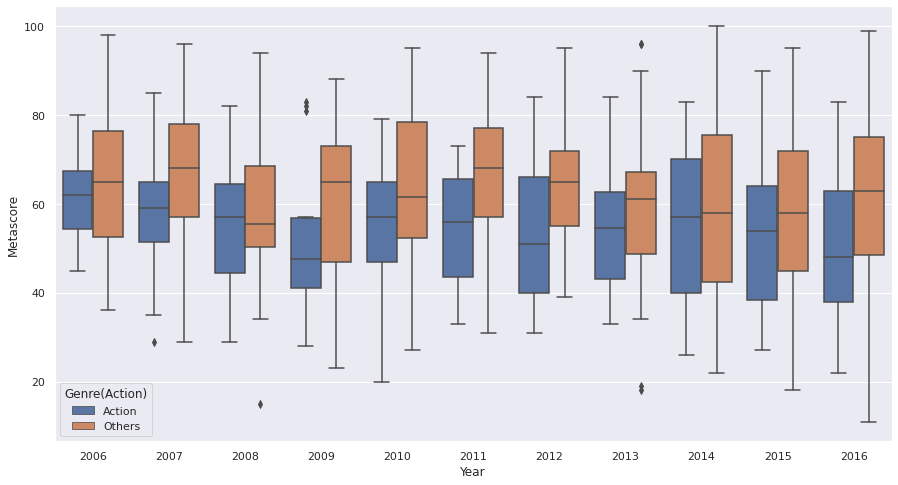

In [ ]:
sns.boxplot(x='Year',y='Metascore',hue = 'Genre(Action)',data=imdb_movies)

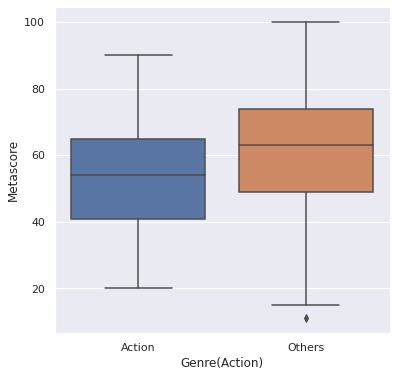

In [ ]:
sns.boxplot(x='Genre(Action)',y='Metascore',data=imdb_movies)

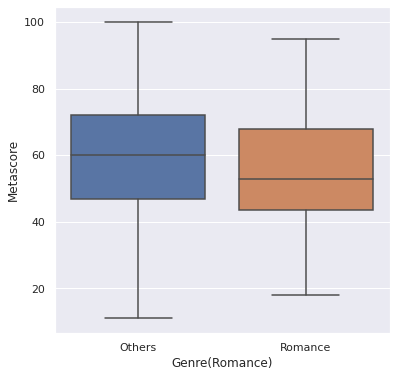

In [ ]:
sns.boxplot(x='Genre(Romance)',y='Metascore',data=imdb_movies)

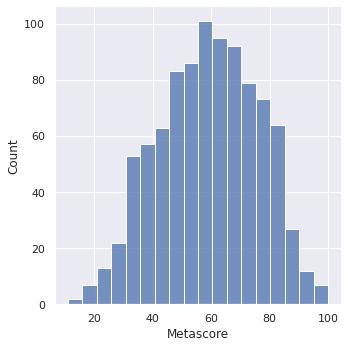

In [ ]:
sns.displot(imdb_movies.Metascore)

In [ ]:
imdb_movies_just_action = imdb_movies.loc[imdb_movies['Genre(Action)'] == 'Action']

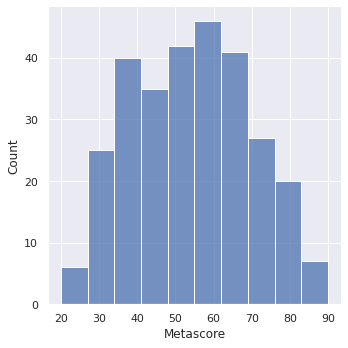

In [ ]:
sns.displot(imdb_movies_just_action.Metascore)

In [ ]:
imdb_movies_action = imdb_movies[imdb_movies['Genre(Action)'] == 'Action']

In [ ]:
imdb_movies_action[['Rating', 'Metascore']].describe()


,Rating,Metascore
count,303.000000,289.000000
mean,6.663366,53.830450
std,0.934375,15.474295
min,3.000000,20.000000
25%,6.000000,41.000000
50%,7.000000,54.000000
75%,7.000000,65.000000
max,9.000000,90.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


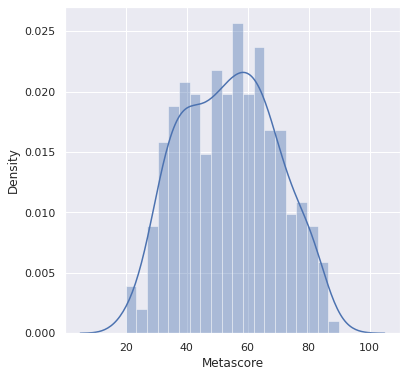

In [ ]:
sns.distplot(imdb_movies_action.Metascore, bins = 20)

In [ ]:
imdb_movies_action_worst =  imdb_movies_action[imdb_movies_action['Metascore'] < 41 ]

In [ ]:
imdb_movies_action.sort_values(by = 'Metascore')

,Id,Title,Genre,Director,Actors,Year,RunTime,Rating,Votes,RevenueMillions,Metascore,Genre(Action),Genre(Sci-Fi),Genre(Crime),Genre(Romance)
581,582,The Last Airbender,"[Action, Adventure, Family]",M. Night Shyamalan,"[Noah Ringer, Nicola Peltz, Jackson Rathbone...",2010,103,4,125129,None,20.0,Action,Others,Others,Others
537,538,The Do-Over,"[Action, Adventure, Comedy]",Steven Brill,"[Adam Sandler, David Spade, Paula Patton, K...",2016,108,6,24761,1,22.0,Action,Others,Others,Others
787,788,Max Steel,"[Action, Adventure, Family]",Stewart Hendler,"[Ben Winchell, Josh Brener, Maria Bello, An...",2016,92,5,11555,4,22.0,Action,Others,Others,Others
51,52,Underworld: Blood Wars,"[Action, Adventure, Fantasy]",Anna Foerster,"[Kate Beckinsale, Theo James, Tobias Menzies...",2016,91,6,41362,30,23.0,Action,Others,Others,Others
215,216,Gods of Egypt,"[Action, Adventure, Fantasy]",Alex Proyas,"[Brenton Thwaites, Nikolaj Coster-Waldau, Ge...",2016,126,6,73568,31,25.0,Action,Others,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,618,Free State of Jones,"[Action, Biography, Drama]",Gary Ross,"[Matthew McConaughey, Gugu Mbatha-Raw, Maher...",2016,139,7,29895,None,NaN,Action,Others,Others,Others
758,759,Conan the Barbarian,"[Action, Adventure, Fantasy]",Marcus Nispel,"[Jason Momoa, Ron Perlman, Rose McGowan, Ste...",2011,113,5,84893,21,NaN,Action,Others,Others,Others
766,767,Ender's Game,"[Action, Sci-Fi]",Gavin Hood,"[Harrison Ford, Asa Butterfield, Hailee Stei...",2013,114,7,194236,62,NaN,Action,Sci_Fi,Others,Others
828,829,Grindhouse,"[Action, Horror, Thriller]",Robert Rodriguez,"[Kurt Russell, Rose McGowan, Danny Trejo, Z...",2007,191,8,160350,25,NaN,Action,Others,Others,Others


In [ ]:
imdb_movies_action_worst[['Title', 'Genre','Director', 'Actors', 'Year', 'Rating', 'Metascore']].sort_values(by = 'Metascore').head(10)

,Title,Genre,Director,Actors,Year,Rating,Metascore
581,The Last Airbender,"[Action, Adventure, Family]",M. Night Shyamalan,"[Noah Ringer, Nicola Peltz, Jackson Rathbone...",2010,4,20.0
537,The Do-Over,"[Action, Adventure, Comedy]",Steven Brill,"[Adam Sandler, David Spade, Paula Patton, K...",2016,6,22.0
787,Max Steel,"[Action, Adventure, Family]",Stewart Hendler,"[Ben Winchell, Josh Brener, Maria Bello, An...",2016,5,22.0
51,Underworld: Blood Wars,"[Action, Adventure, Fantasy]",Anna Foerster,"[Kate Beckinsale, Theo James, Tobias Menzies...",2016,6,23.0
215,Gods of Egypt,"[Action, Adventure, Fantasy]",Alex Proyas,"[Brenton Thwaites, Nikolaj Coster-Waldau, Ge...",2016,6,25.0
624,Taken 3,"[Action, Thriller]",Olivier Megaton,"[Liam Neeson, Forest Whitaker, Maggie Grace,...",2014,6,26.0
386,Pixels,"[Action, Comedy, Family]",Chris Columbus,"[Adam Sandler, Kevin James, Michelle Monagha...",2015,6,27.0
552,Fantastic Four,"[Action, Adventure, Sci-Fi]",Josh Trank,"[Miles Teller, Kate Mara, Michael B. Jordan,...",2015,4,27.0
452,Pandorum,"[Action, Horror, Mystery]",Christian Alvart,"[Dennis Quaid, Ben Foster, Cam Gigandet, An...",2009,7,28.0
424,London Has Fallen,"[Action, Crime, Drama]",Babak Najafi,"[Gerard Butler, Aaron Eckhart, Morgan Freema...",2016,6,28.0
